In [107]:
import pandas as pd
import numpy as np

test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/57854a33a5a8eebbfbf387a6a7cb20b66bd7a2d0/bigdatamart_Test.csv", low_memory=False)
train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/cbf0e349ff31d0fbf08a50e232bc42add646b27d/bigdatamart_Train.csv", low_memory=False)

In [108]:
train[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
train.columns.equals(test.columns)

False

In [110]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [111]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
train.shape,test.shape,data.shape

((8523, 13), (5681, 12), (14204, 13))

In [112]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [113]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [114]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [115]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [116]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

1559 products
10 outlets/stores
Item_Type has 16 unique values

In [117]:
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

print("Frequency Table")
for col in categorical_columns:
    print('\nFrequency table for varible %s' % col)
    print(data[col].value_counts(sort=True, dropna=False))

Frequency Table

Frequency table for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency table for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency table for varible Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency table for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Fr

tem_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [118]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                  'low fat': 'Low Fat', 
                                  'reg':'Regular'}, inplace=True)
data["Item_Fat_Content"].value_counts(sort=True, dropna=False)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [119]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

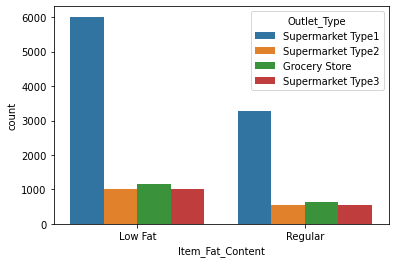

In [120]:
sns.countplot(x="Item_Fat_Content", hue="Outlet_Type", data=data);

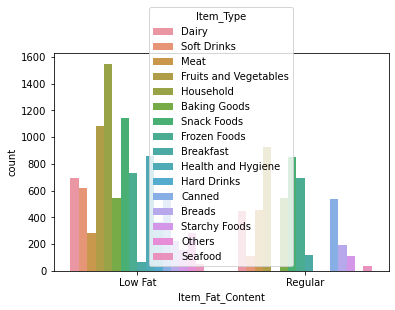

In [121]:
sns.countplot(x="Item_Fat_Content",  hue="Item_Type", data=data);

<AxesSubplot:>

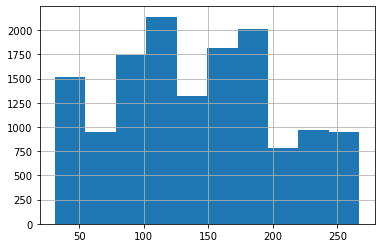

In [122]:
data['Item_MRP'].hist()

Data Cleaning
Imputing Missing Values
'Item_Weight'

In [123]:
item_avg_weight = data.groupby("Item_Identifier").Item_Weight.mean()

miss_idx = data['Item_Weight'].isnull() 

print('Orignal #missing: %d' % sum(miss_idx))

data.loc[miss_idx, 'Item_Weight'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print('Final # missing: %d' % sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final # missing: 0


In [124]:
from scipy.stats import mode

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

miss_idx = data['Outlet_Size'].isnull() 

print('\nOrignal #missing: %d' % sum(miss_idx))
data.loc[miss_idx, 'Outlet_Size'] = data.loc[miss_idx, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Final # missing: %d' % sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
Final # missing: 0


Feature Engineering
Step 1: Consider combining Outlet_Type

In [125]:
data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

Step 2: Modify Item_Visibility

In [126]:
visibility_avg = data.groupby('Item_Identifier').Item_Visibility.mean()


miss_idx = (data['Item_Visibility'] == 0)

'Number of 0 values initially: %d' % sum(miss_idx)
data.loc[miss_idx, 'Item_Visibility'] = data.loc[miss_idx, 'Item_Identifier'].apply(lambda x: visibility_avg[x])
'Number of 0 values after modification: %d' % sum(data['Item_Visibility'] == 0)

'Number of 0 values after modification: 0'

In [127]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

Step 3: Create a broad category of type of item
Combine the Item_Type variable
use the Item_Identifier variable to create a new column

In [128]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Step 4: Combine categories based on sales
The ones with high average sales could be combined together

In [129]:
train_idx = (data['source'] == 'train')

sub_data = data.loc[train_idx, ['Item_Identifier', 'Item_Outlet_Sales']]

item_avg_sales = sub_data.groupby("Item_Identifier").Item_Outlet_Sales.mean()

percentile = np.percentile(item_avg_sales, np.arange(0, 100, 25))
twentyfive = percentile[1]
fifty = percentile[2]
seventyfive = percentile[3]

first_idx = item_avg_sales.apply(lambda x: x < twentyfive)
second_idx = item_avg_sales.apply(lambda x: x >= twentyfive and x < fifty)
third_idx = item_avg_sales.apply(lambda x: x >= fifty and x < seventyfive)
fourth_idx = item_avg_sales.apply(lambda x: x > seventyfive)

first = item_avg_sales.loc[first_idx, ].index.values
second = item_avg_sales.loc[second_idx, ].index.values
thrid = item_avg_sales.loc[third_idx, ].index.values
fourth = item_avg_sales.loc[fourth_idx, ].index.values

def id_to_percentile(x):
    if x in first:
        return('first')
    elif x in second:
        return('second')
    elif x in thrid:
        return('thrid')
    elif x in fourth:
        return('fourth')

data['Percentile'] = data['Item_Identifier'].apply(lambda x: id_to_percentile(x))

In [130]:
data['Percentile'].value_counts()

first     3580
second    3567
thrid     3556
fourth    3501
Name: Percentile, dtype: int64

Step 5: Determine the years of operation of a store
Create a new column depicting the years of operation of a store.

In [131]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Step 6: Modify categories of Item_Fat_Content
In step 3, there were some non-consumables as well and a fat-content should not be specified for them.
create a separate category for such kind of observations.

In [132]:
NC_idx = (data['Item_Type_Combined'] == "Non-Consumable")

data.loc[NC_idx, 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Step 7: One-Hot Enoding for Categorical variables

In [133]:
np.array(data.select_dtypes(include=["object_"]).columns)

array(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source', 'Item_Type_Combined', 'Percentile'],
      dtype=object)

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet', 'Percentile']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [135]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Percentile,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,0.931078,1,1,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0.933420,0,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,0.960069,1,2,14,9
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,1.000000,1,1,15,0
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,1.000000,2,0,26,1


In [136]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                              'Item_Type_Combined', 'Outlet', 'Percentile'])

In [137]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

Step 8: Exporting Data

In [138]:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

Model Building
Define a generic Function

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import scorers

ModuleNotFoundError: No module named 'sklearn.metrics.scorer'

In [156]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    alg.fit(dtrain[predictors], dtrain[target])
        

    dtrain_predictions = alg.predict(dtrain[predictors])

    
    cv_score = cross_val_score(alg, dtrain[predictors], 
                                                dtrain[target], 
                                                cv=20, 
                                                scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    
    "\nModel Report"
    "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, 
                                                             dtrain_predictions))
    "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), 
                                                                             np.std(cv_score),
                                                                             np.min(cv_score),
                                                                             np.max(cv_score))
    
    dtest[target] = alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [157]:
mean_sales = train['Item_Outlet_Sales'].mean()

base1 = test[['Item_Identifier','Outlet_Identifier']]
base1.loc['Item_Outlet_Sales'] = mean_sales

Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target] + IDcol]

alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')

coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.